# Q2. 누구를 타겟팅해야 하는가? 🎯

## 🎯 분석 목표
겨울 선크림 시장의 블루오션을 공략하기 위한 **최적 타겟 페르소나** 발굴

## 분석 배경

**Q1에서 발견한 사실:**
- 겨울 선크림 시장은 여름의 약 50% 규모
- 수요는 있지만 인식 부족으로 시장 규모 제한적

**스키장과 UV의 관계:**
- 눈 반사로 인해 UV 노출이 여름만큼 또는 더 높음
- 하지만 스키장 방문객들의 선크림 인식 부족
- → **무지로 인한 미개척 시장 존재할지도 모른다는 가정**


## 📂 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경로 설정
data_dir = Path("../data")

print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


In [2]:
print("=" * 60)
print("📂 세그먼트 데이터 로드")
print("=" * 60)

# 세그먼트 정의
segment_names = [
    "20대_여성", "30대_여성", "40대_여성", 
    "20대_남성", "30대_남성", "40대_남성"
]

# 키워드 그룹
keywords = ["선크림", "스키장", "스키", "스노우보드"]

# 전체 데이터 로드
all_data = {}

for keyword in keywords:
    all_data[keyword] = {}
    for seg_name in segment_names:
        filepath = data_dir / f"03_segment_{keyword}_{seg_name}.csv"
        df = pd.read_csv(filepath)
        df['date'] = pd.to_datetime(df['date'])
        all_data[keyword][seg_name.replace('_', ' ')] = df

print(f"\n✅ 로드 완료: {len(keywords)}개 키워드 × {len(segment_names)}개 세그먼트")

📂 세그먼트 데이터 로드

✅ 로드 완료: 4개 키워드 × 6개 세그먼트


## 📊 세그먼트별 평균 검색량 계산

In [3]:
# 각 키워드별 세그먼트 평균 계산
segment_stats = {}

for keyword in keywords:
    segment_stats[keyword] = {}
    for seg_name, df_seg in all_data[keyword].items():
        avg_value = df_seg[keyword].mean()
        segment_stats[keyword][seg_name] = avg_value

# DataFrame으로 변환
df_stats = pd.DataFrame(segment_stats)
df_stats = df_stats.reset_index().rename(columns={'index': '세그먼트'})

print("세그먼트별 평균 검색량:")
print(df_stats.to_string(index=False))

세그먼트별 평균 검색량:
  세그먼트       선크림       스키장        스키     스노우보드
20대 여성 48.735216 17.375799 28.594573 30.328499
30대 여성 50.358601 20.210511 32.071309 26.580285
40대 여성 50.026493 18.026765 25.013310 27.459063
20대 남성 47.692777 18.286345 23.410675 19.624686
30대 남성 50.530298 19.669561 26.450109 21.177511
40대 남성 48.823448 20.412918 25.557660 25.317215


## 🎯 4사분면 교차 분석: 선크림 vs 겨울스포츠

**목적**: 선크림 인식이 낮지만 겨울스포츠 관심이 높은 세그먼트 찾기

**4사분면 정의:**
- **A (둘 다 높음)**: 선크림↑ + 스포츠↑ → 리마인더 캠페인
- **B (블루오션!)**: 선크림↓ + 스포츠↑ → **교육 마케팅 타겟** 🎯
- **C (선크림만)**: 선크림↑ + 스포츠↓ → 온라인/실내 타겟
- **D (둘 다 낮음)**: 선크림↓ + 스포츠↓ → 우선순위 낮음

In [4]:
# 선크림 평균 (기준선)
suncream_avg = df_stats['선크림'].mean()

# 겨울스포츠 통합: 스키장 + 스키 + 스노우보드 평균
df_stats['겨울스포츠'] = df_stats[['스키장', '스키', '스노우보드']].mean(axis=1)
winter_sport_avg = df_stats['겨울스포츠'].mean()

print(f"선크림 전체 평균: {suncream_avg:.2f}")
print(f"겨울스포츠 전체 평균: {winter_sport_avg:.2f}")

# 4사분면 분류
def classify_quadrant(row):
    sc = row['선크림']
    ws = row['겨울스포츠']
    
    if sc >= suncream_avg and ws >= winter_sport_avg:
        return 'A (둘 다 높음)'
    elif sc < suncream_avg and ws >= winter_sport_avg:
        return 'B (블루오션!)'
    elif sc >= suncream_avg and ws < winter_sport_avg:
        return 'C (선크림만)'
    else:
        return 'D (둘 다 낮음)'

df_stats['사분면'] = df_stats.apply(classify_quadrant, axis=1)

print("\n" + "=" * 60)
print("4사분면 분류 결과")
print("=" * 60)
print(df_stats[['세그먼트', '선크림', '겨울스포츠', '사분면']].to_string(index=False))

선크림 전체 평균: 49.36
겨울스포츠 전체 평균: 23.64

4사분면 분류 결과
  세그먼트       선크림     겨울스포츠        사분면
20대 여성 48.735216 25.432957  B (블루오션!)
30대 여성 50.358601 26.287368 A (둘 다 높음)
40대 여성 50.026493 23.499713   C (선크림만)
20대 남성 47.692777 20.440569 D (둘 다 낮음)
30대 남성 50.530298 22.432394   C (선크림만)
40대 남성 48.823448 23.762598  B (블루오션!)


## 💎 세그먼트 발견

In [5]:
# 블루오션 세그먼트 추출
blueocean = df_stats[df_stats['사분면'] == 'B (블루오션!)'].copy()
blueocean = blueocean.sort_values('겨울스포츠', ascending=False)

print("\n" + "=" * 60)
print("💎 블루오션 세그먼트 (선크림↓ + 겨울스포츠↑)")
print("=" * 60)

if len(blueocean) > 0:
    print(f"\n발견: {len(blueocean)}개 블루오션 세그먼트\n")
    for idx, row in blueocean.iterrows():
        print(f"🎯 {row['세그먼트']}")
        print(f"   선크림 인식: {row['선크림']:.1f} (평균 이하)")
        print(f"   겨울스포츠 관심: {row['겨울스포츠']:.1f} (평균 이상)")
        print(f"   스키장: {row['스키장']:.1f} / 스키: {row['스키']:.1f} / 보드: {row['스노우보드']:.1f}")
        print()
else:
    print("\n⚠️  명확한 블루오션 세그먼트가 발견되지 않았습니다.")
    print("→ 기준을 조정하거나 다른 전략을 고려해야 합니다.")


💎 블루오션 세그먼트 (선크림↓ + 겨울스포츠↑)

발견: 2개 블루오션 세그먼트

🎯 20대 여성
   선크림 인식: 48.7 (평균 이하)
   겨울스포츠 관심: 25.4 (평균 이상)
   스키장: 17.4 / 스키: 28.6 / 보드: 30.3

🎯 40대 남성
   선크림 인식: 48.8 (평균 이하)
   겨울스포츠 관심: 23.8 (평균 이상)
   스키장: 20.4 / 스키: 25.6 / 보드: 25.3



In [6]:
# 보조 타겟: A 사분면 (둘 다 높음)
quadrant_a = df_stats[df_stats['사분면'] == 'A (둘 다 높음)'].copy()
quadrant_a = quadrant_a.sort_values('선크림', ascending=False)

print("\n" + "=" * 60)
print("✅ 보조 타겟 (선크림↑ + 겨울스포츠↑)")
print("=" * 60)

if len(quadrant_a) > 0:
    print(f"\n발견: {len(quadrant_a)}개 세그먼트\n")
    for idx, row in quadrant_a.iterrows():
        print(f"✅ {row['세그먼트']}")
        print(f"   선크림 인식: {row['선크림']:.1f} (이미 높음)")
        print(f"   겨울스포츠 관심: {row['겨울스포츠']:.1f} (높음)")
        print()
else:
    print("\n해당 세그먼트 없음")


✅ 보조 타겟 (선크림↑ + 겨울스포츠↑)

발견: 1개 세그먼트

✅ 30대 여성
   선크림 인식: 50.4 (이미 높음)
   겨울스포츠 관심: 26.3 (높음)



## 📊 시각화: 4사분면 산점도

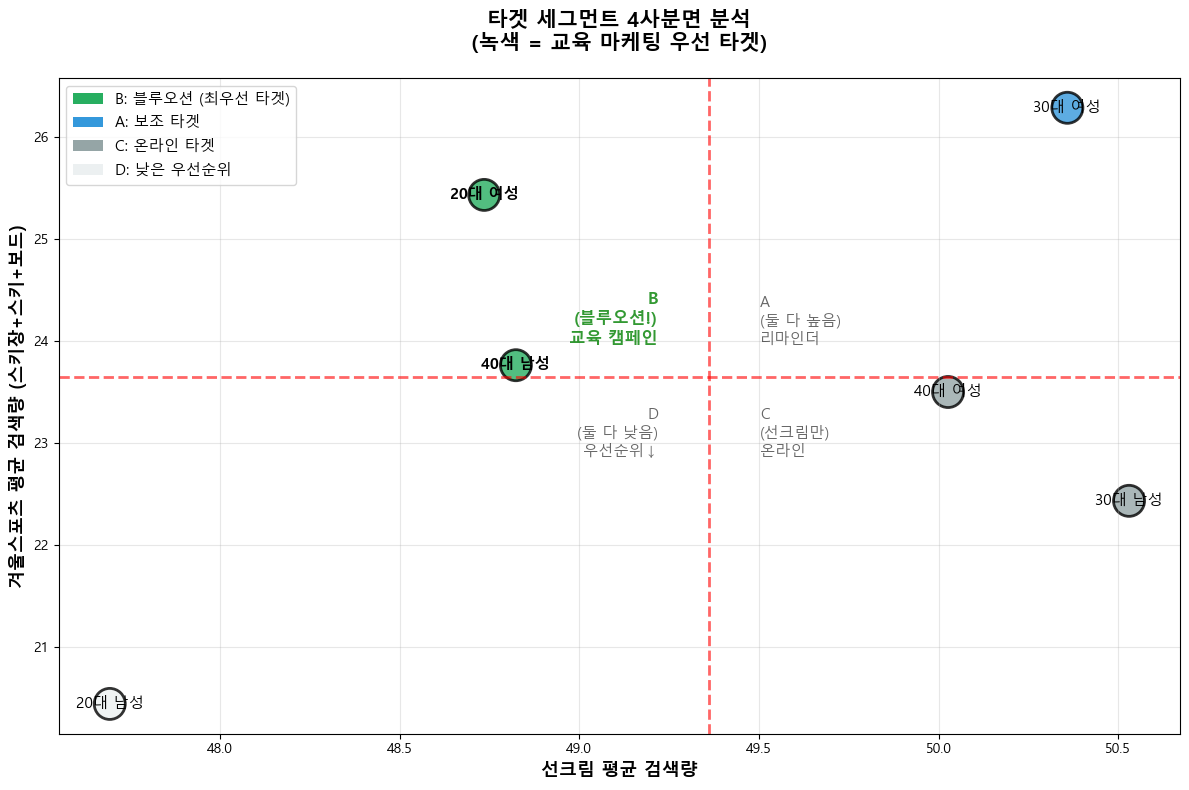

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

# 색상 매핑
color_map = {
    'A (둘 다 높음)': '#3498db',      # 파랑
    'B (블루오션!)': '#27ae60',       # 초록 (강조)
    'C (선크림만)': '#95a5a6',        # 회색
    'D (둘 다 낮음)': '#ecf0f1'       # 연회색
}

colors = df_stats['사분면'].map(color_map)

# 산점도
scatter = ax.scatter(df_stats['선크림'], df_stats['겨울스포츠'], 
                    c=colors, s=500, alpha=0.8, edgecolors='black', linewidth=2)

# 세그먼트 레이블
for idx, row in df_stats.iterrows():
    weight = 'bold' if row['사분면'] == 'B (블루오션!)' else 'normal'
    ax.annotate(row['세그먼트'], (row['선크림'], row['겨울스포츠']), 
               fontsize=11, ha='center', va='center', fontweight=weight)

# 평균선 (4사분면 구분)
ax.axhline(y=winter_sport_avg, color='red', linestyle='--', alpha=0.6, linewidth=2)
ax.axvline(x=suncream_avg, color='red', linestyle='--', alpha=0.6, linewidth=2)

# 사분면 라벨
offset_x = (df_stats['선크림'].max() - df_stats['선크림'].min()) * 0.05
offset_y = (df_stats['겨울스포츠'].max() - df_stats['겨울스포츠'].min()) * 0.05

ax.text(suncream_avg + offset_x, winter_sport_avg + offset_y, 
       'A\n(둘 다 높음)\n리마인더', fontsize=11, alpha=0.6, ha='left', va='bottom')
ax.text(suncream_avg - offset_x, winter_sport_avg + offset_y, 
       'B\n(블루오션!)\n교육 캠페인', fontsize=12, alpha=0.8, ha='right', va='bottom', 
       color='green', fontweight='bold')
ax.text(suncream_avg + offset_x, winter_sport_avg - offset_y, 
       'C\n(선크림만)\n온라인', fontsize=11, alpha=0.6, ha='left', va='top')
ax.text(suncream_avg - offset_x, winter_sport_avg - offset_y, 
       'D\n(둘 다 낮음)\n우선순위↓', fontsize=11, alpha=0.6, ha='right', va='top')

ax.set_xlabel('선크림 평균 검색량', fontsize=13, fontweight='bold')
ax.set_ylabel('겨울스포츠 평균 검색량 (스키장+스키+보드)', fontsize=13, fontweight='bold')
ax.set_title('타겟 세그먼트 4사분면 분석\n(녹색 = 교육 마케팅 우선 타겟)', 
            fontsize=15, fontweight='bold', pad=20)
ax.grid(alpha=0.3)

# 범례
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#27ae60', label='B: 블루오션 (최우선 타겟)'),
    Patch(facecolor='#3498db', label='A: 보조 타겟'),
    Patch(facecolor='#95a5a6', label='C: 온라인 타겟'),
    Patch(facecolor='#ecf0f1', label='D: 낮은 우선순위')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()